### 手写线性回归

https://mubaris.com/posts/linear-regression/

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,5)

In [17]:
data = pd.read_csv('headbrain.csv')
data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [18]:
data.shape

(237, 4)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


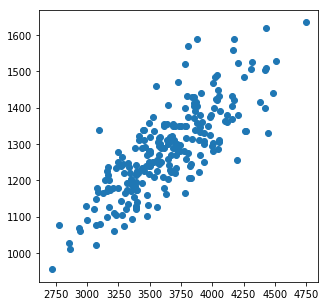

In [26]:
# set x and Y in data
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
plt.scatter(X, Y)

<img src='linear_regression.png'>

In [30]:
# find the coeffients
mean_X = np.mean(X)
mean_Y = np.mean(Y)
n = data.shape[0]
numer, denom = 0,0
for i in xrange(n):
    numer += (X[i] - mean_X)*(Y[i] - mean_Y)
    denom += (X[i] - mean_X)**2
beta1 = float(numer)/float(denom)
beta2 = mean_Y - beta1 * mean_X

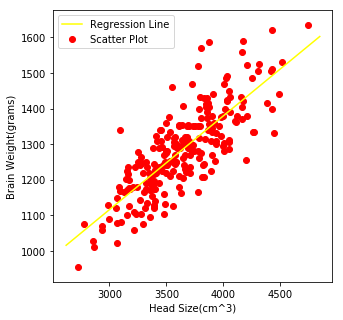

In [33]:
# plot line
max_X = np.max(X) + 100
min_X = np.min(X) - 100
x = np.linspace(min_X, max_X, 1000)
y = beta2 + beta1*x
plt.plot(x, y, color='yellow', label='Regression Line')
plt.scatter(X, Y, c='red', label='Scatter Plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()

<img src='linear_regression1.png'>

In [40]:
# evaluate models
rmse = 0
for i in xrange(n):
    y_pred = beta2 + beta1 * X[i]
    rmse += (y_pred - Y[i])**2
rmse = np.sqrt(float(rmse)/float(n))
print 'Root mean square error: [%.4f]'%rmse

Root mean square error: [72.1206]


<img src='linear_regression2.png'>

In [43]:
# find the r^2
ss_t, ss_r = 0,0
for i in xrange(n):
    y_pred = beta2 + beta1 * X[i]
    ss_t += (Y[i] - mean_Y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 - float(ss_r)/float(ss_t)
print 'r2 in this model: [%.4f]'%r2

r2 in this model: [0.6393]


In [51]:
# use the sklearn to fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((n,1))
model = LinearRegression()
model = model.fit(X, Y)
Y_pred = model.predict(X)

mse = mean_squared_error(Y, Y_pred)
Rmse = np.sqrt(mse)
r2_score = model.score(X, Y)
print 'Sklearn linearn model'
print '  Root mean square error: [%.4f]'%Rmse
print '  r2 in this model: [%.4f]'%r2_score

Sklearn linearn model
  Root mean square error: [72.1206]
  r2 in this model: [0.6393]


### 书本

In [1]:
# 4.2 回归分析
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库

In [2]:
# 数据准备
raw_data = np.loadtxt('regression.txt')  # 读取数据文件
X = raw_data[:, :-1]  # 分割自变量
y = raw_data[:, -1]  # 分割因变量

In [3]:
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表


/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [4]:
# 模型效果指标评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线


samples: 506 	 features: 13
----------------------------------------------------------------------
cross validation result:
                         0         1         2         3         4         5
BayesianRidge     0.662422  0.677079  0.549702  0.776896 -0.139738 -0.024448
LinearRegression  0.642240  0.611521  0.514471  0.785033 -0.143673 -0.015390
ElasticNet        0.582476  0.603773  0.365912  0.625645  0.437122  0.200454
SVR              -0.000799 -0.004447 -1.224386 -0.663773 -0.122252 -1.374062
GBR               0.748059  0.785695  0.768806  0.863472  0.378696  0.530325
----------------------------------------------------------------------
regression metrics:
                        ev       mae        mse        r2
BayesianRidge     0.731143  3.319204  22.696772  0.731143
LinearRegression  0.740608  3.272945  21.897779  0.740608
ElasticNet        0.686094  3.592915  26.499828  0.686094
SVR               0.173548  5.447960  71.637552  0.151410
GBR               0.975126  1.151

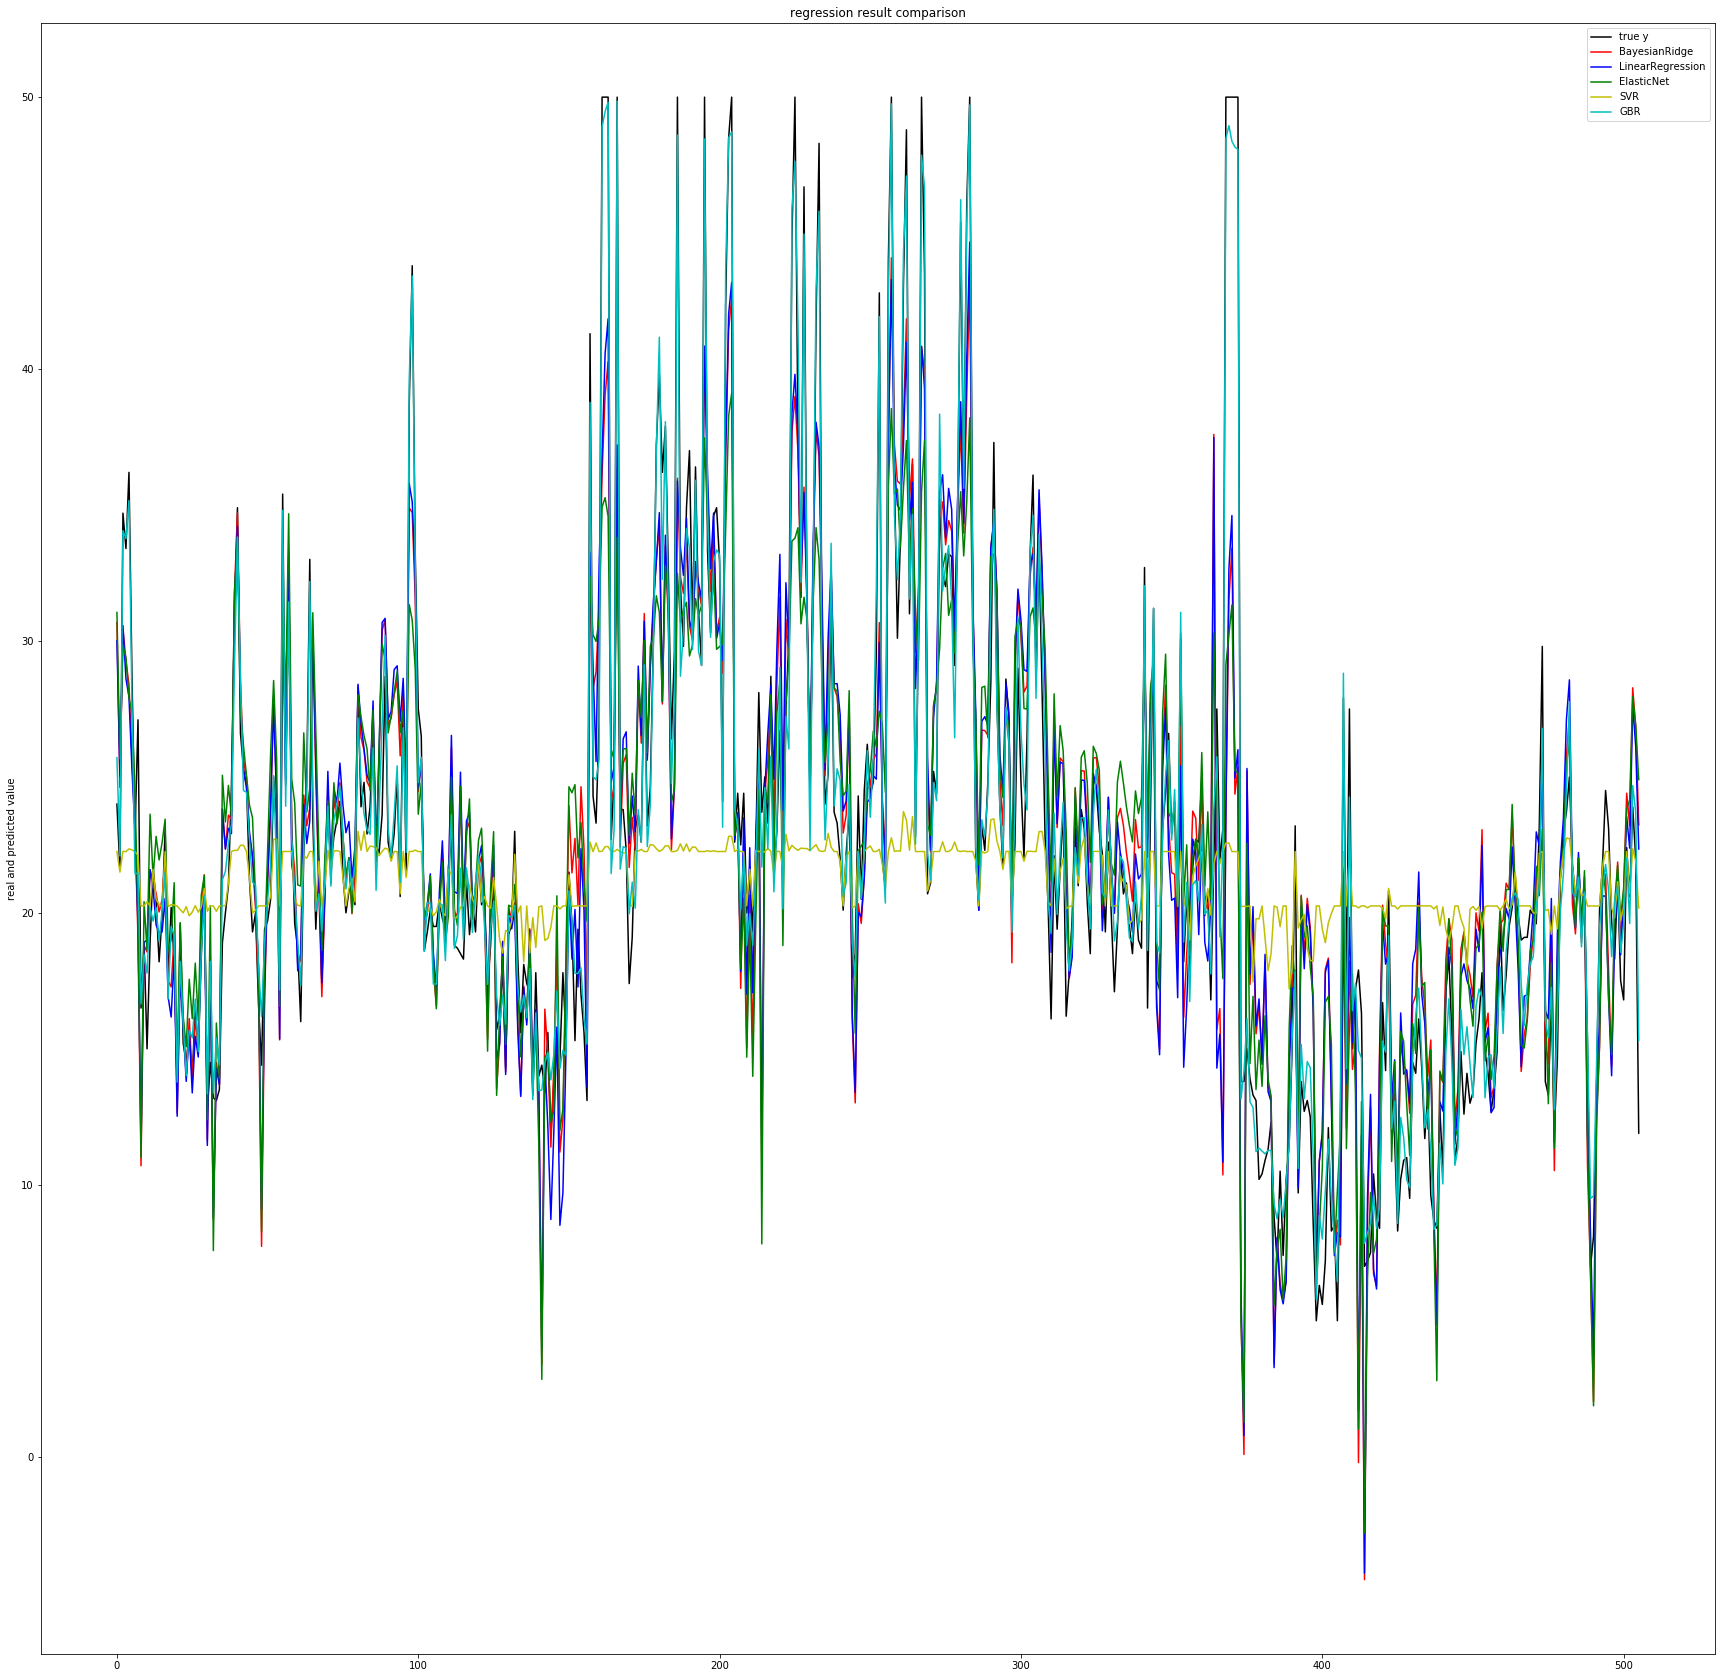

In [5]:
# 模型效果可视化
plt.figure(figsize=(30,30))  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [8]:
# 模型应用
print ('regression prediction')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    new_point = np.array(new_point).reshape((1,len(new_point)))
    new_pre_y = model_gbr.predict(new_point)  # 使用GBR进行预测
    print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息


regression prediction
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16
